In [1]:

import requests
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv'
data = requests.get(url)
open('data.csv','wb').write(data.content)

4307302

In [7]:
# read the csv file
import csv

import numpy as np

from matplotlib import pyplot as plt


data1=[]
date=[]
countries=[]

bar=[]


with open('data.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        data1.append(row[4])
        date.append(row[0])
        bar.append(row[5])
        countries.append(row[6])
data1 = data1[1:]
data1.reverse()
data2=[]
countries=countries[1:]
countries.reverse()

# interact with users
print('type the country that you wan to check and type "!" to stop')
country = []
chosen = True
while chosen == True:
    country_chosen = input('please input country: ')
    country_chosen = country_chosen.title()
    if country_chosen != '!':
        if country_chosen in countries:
            country.append(country_chosen)
        else:
            print('please input the correct countries')
    else:
        chosen = False
print(country)

# read the file later
date=date[1:]
date.reverse()

bar = bar[1:]
bar.reverse()
bar1=[]
for ele in data1:
    ele = float(ele)
    data2.append(ele)
for ele1 in bar:
    ele1 = float(ele1)
    bar1.append(ele1)
    
final_imfo = {

}

imformation = [date,countries,data2,bar]

temp1=[]#date
temp2=[]#infected
temp3=[]#death

for j in range(len(countries)):
    if imformation[1][j] in country:
        temp1.append(imformation[0][j])
        temp2.append(imformation[2][j])
        temp3.append(imformation[3][j])
        final_imfo[imformation[1][j]]=[temp1, temp2,temp3]
        length = len(final_imfo[imformation[1][j]][0])#
        date=final_imfo[imformation[1][j]][0]
    if imformation[1][j] not in country:
        temp1=[]#date
        temp2=[]#infected
        temp3=[]#death

type the country you want to check and type "!" to stop
please input country: china
please input country: JAPAN
please input country: canada
please input country: ppppp
please input the correct countries
please input country: !
['China', 'Japan', 'Canada']


In [8]:
time = {}
q=0
while q < length:
    time[date[q]]=q
    q+=1
print(time)
while True:
    start = input('please input the start day by dd/mm/yy ')
    end = input('please input the end day by dd/mm/yy ')
    s=time[start]
    e=time[end]
    if e-s < 0:
        print('period incorrect')
        continue
    else:
        break
print('Successful input')

{'31/12/2019': 0, '01/01/2020': 1, '02/01/2020': 2, '03/01/2020': 3, '04/01/2020': 4, '05/01/2020': 5, '06/01/2020': 6, '07/01/2020': 7, '08/01/2020': 8, '09/01/2020': 9, '10/01/2020': 10, '11/01/2020': 11, '12/01/2020': 12, '13/01/2020': 13, '14/01/2020': 14, '15/01/2020': 15, '16/01/2020': 16, '17/01/2020': 17, '18/01/2020': 18, '19/01/2020': 19, '20/01/2020': 20, '21/01/2020': 21, '22/01/2020': 22, '23/01/2020': 23, '24/01/2020': 24, '25/01/2020': 25, '26/01/2020': 26, '27/01/2020': 27, '28/01/2020': 28, '29/01/2020': 29, '30/01/2020': 30, '31/01/2020': 31, '01/02/2020': 32, '02/02/2020': 33, '03/02/2020': 34, '04/02/2020': 35, '05/02/2020': 36, '06/02/2020': 37, '07/02/2020': 38, '08/02/2020': 39, '09/02/2020': 40, '10/02/2020': 41, '11/02/2020': 42, '12/02/2020': 43, '13/02/2020': 44, '14/02/2020': 45, '15/02/2020': 46, '16/02/2020': 47, '17/02/2020': 48, '18/02/2020': 49, '19/02/2020': 50, '20/02/2020': 51, '21/02/2020': 52, '22/02/2020': 53, '23/02/2020': 54, '24/02/2020': 55, '

China
0.029301899331161008
Japan
0.2948587846340226
Canada
0.5674852792109799


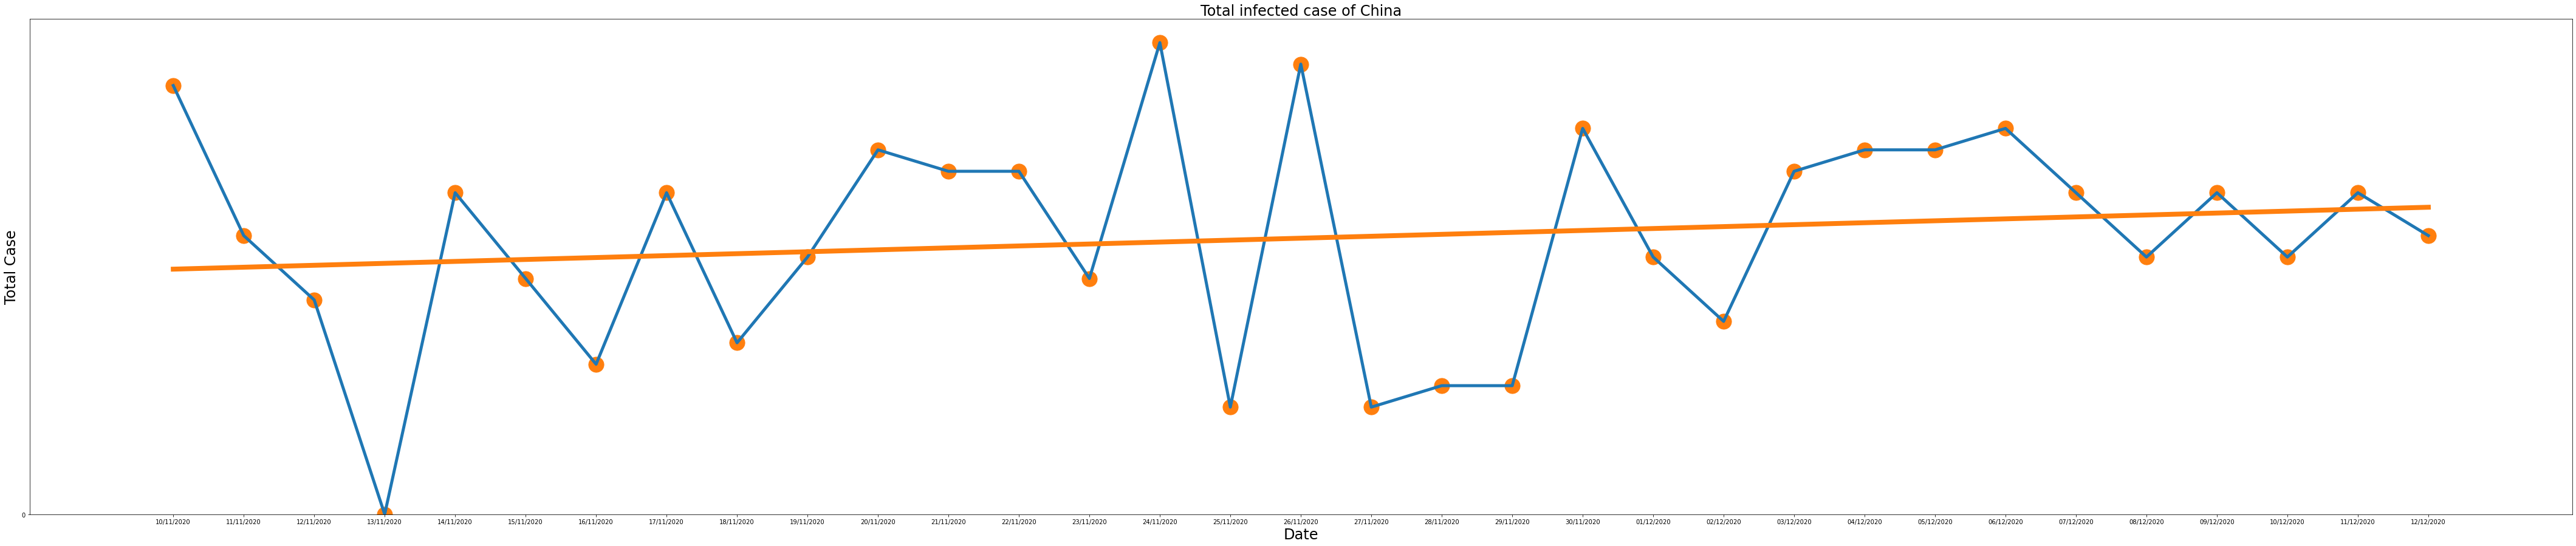

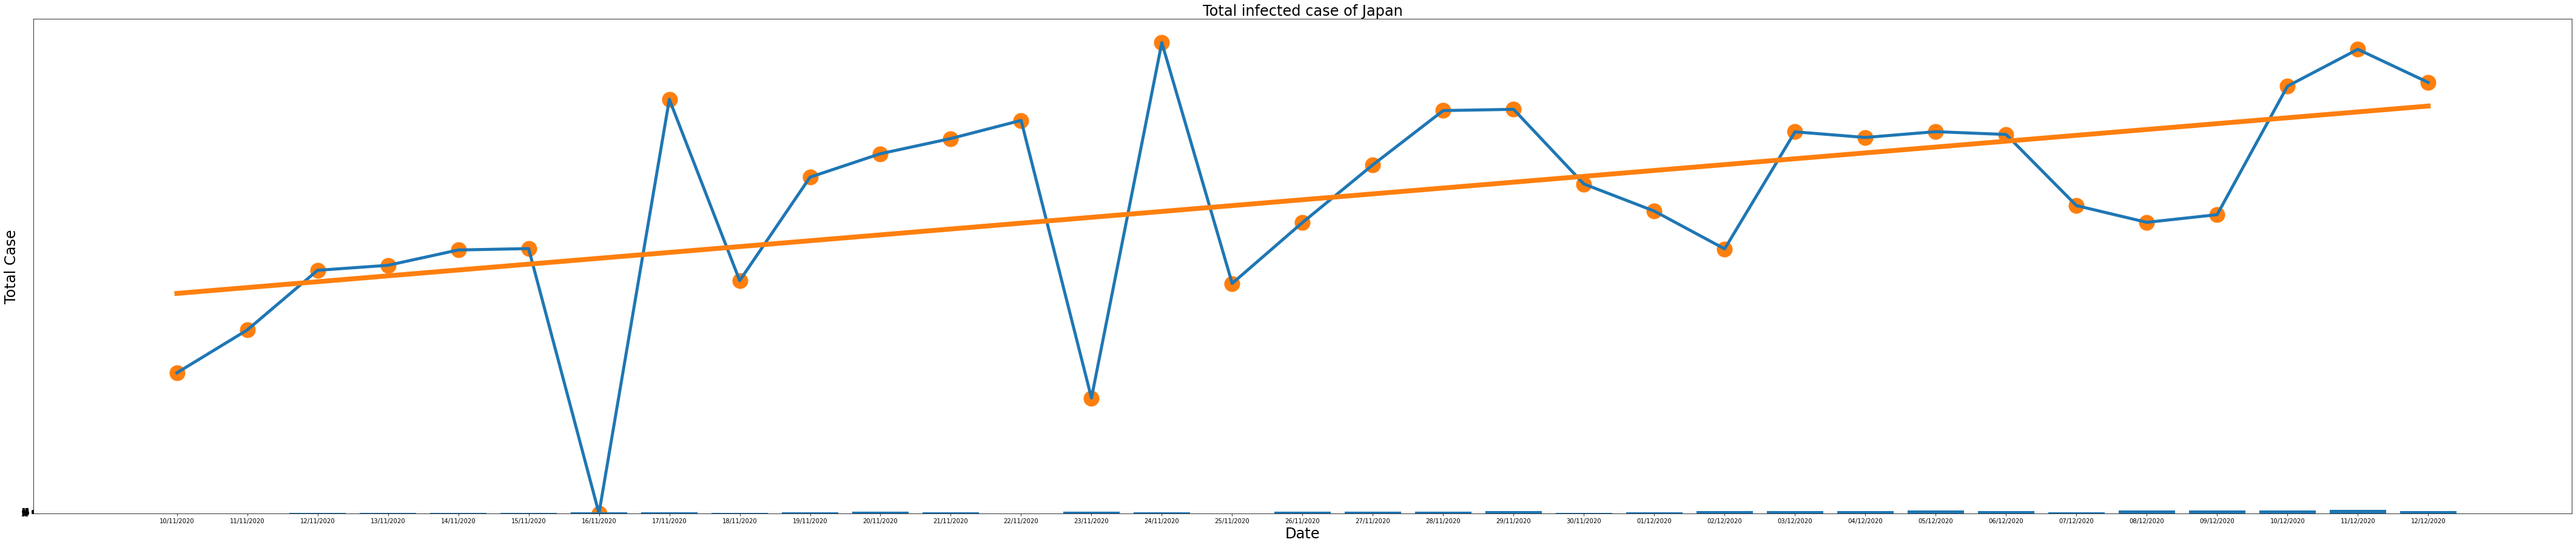

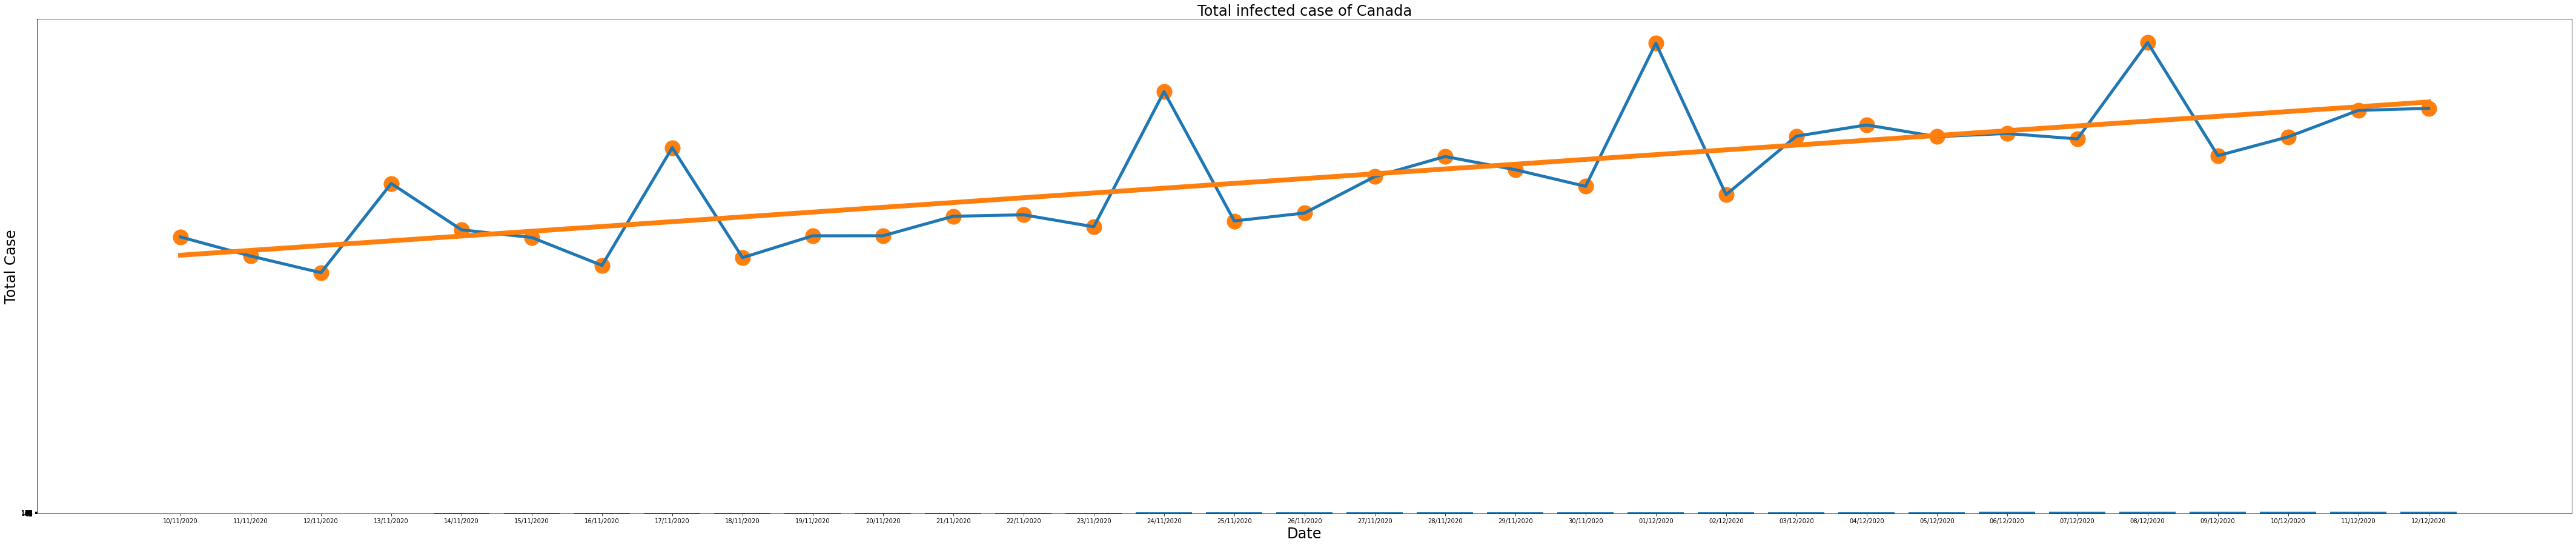

In [9]:
from sklearn.linear_model import LinearRegression
%matplotlib inline
coefficient={}
for i in country:
    plt.figure(figsize=(75,15))
    plt.plot(final_imfo[i][0][s:e],final_imfo[i][1][s:e],linewidth=5)
    plt.bar(final_imfo[i][0][s:e],final_imfo[i][2][s:e])

    plt.xlabel("Date",fontsize=24)
    plt.ylabel("Total Case",fontsize=24)
    plt.title("Total infected case of "+i,fontsize=24)
    path=i+'.jpg'
    
    x = final_imfo[i][0][s:e]
    y = final_imfo[i][1][s:e]
        
    print(i)


    #linear regression
    new_x=[]
    new_y=[]
    
    for i in range(len(x)):
        new_x.append(float(i))
    for j in y:
        new_y.append(float(j))
    new_x = np.reshape(new_x,newshape=(len(new_x),1))
    new_y = np.reshape(new_y,newshape=(len(new_y),1))

    lr=LinearRegression()
    lr.fit(new_x,new_y)
    
    print(lr.score(new_x,new_y))
    
    y_hat = lr.predict(new_x)

    plt.scatter(new_x,new_y,s=2*s)
    plt.plot(new_x, y_hat,linewidth=8)
    plt.savefig(path)
plt.plot(new_x, y_hat,linewidth=8)


In [10]:
# generate the report
!pip install python-docx

In [10]:
exist=False

In [11]:
import docx
coe=[]
if exist==False:
    report=docx.Document()
    exist = True
elif exist == True:
    report=docx.Document('Report.docx')
for i in country:
    path=i+'.jpg'
    report.add_paragraph(i)
    report.add_picture(path,width=docx.shared.Inches(7.5),height=docx.shared.Inches(2.5))
report.save('Report.docx')
